# Preprocessing
## imports

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime,timedelta
connection_post = sqlite3.connect('cruise_post.db')
connection_pre = sqlite3.connect('cruise_pre.db')
df_pre = pd.read_sql_query("SELECT * FROM cruise_pre",connection_pre,index_col="index")
df_post = pd.read_sql_query("SELECT * FROM cruise_post",connection_post,index_col="index")
connection_post.close()
connection_pre.close()

## Basic information and statistics

information such as data size, features to be compared to the assessment questions documents' feature descriptions.
common statistics to see the numerical features' data overall patterns  

In [2]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133746 entries, 0 to 133745
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Gender                                      120290 non-null  object 
 1   Date of Birth                               119062 non-null  object 
 2   Source of Traffic                           133746 non-null  object 
 3   Onboard Wifi Service                        114254 non-null  object 
 4   Embarkation/Disembarkation time convenient  118103 non-null  float64
 5   Ease of Online booking                      115391 non-null  float64
 6   Gate location                               116606 non-null  float64
 7   Logging                                     133746 non-null  object 
 8   Onboard Dining Service                      116937 non-null  object 
 9   Online Check-in                             118059 non-null  float64
 

In [3]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133746 entries, 0 to 133745
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Cruise Name      117815 non-null  object 
 1   Ticket Type      113685 non-null  object 
 2   Cruise Distance  119260 non-null  object 
 3   Ext_Intcode      133746 non-null  object 
 4   WiFi             64012 non-null   float64
 5   Dining           133746 non-null  int64  
 6   Entertainment    73689 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ MB


In [4]:
df_pre.describe()

,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Online Check-in,Cabin Comfort,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness
count,118103.000000,115391.000000,116606.000000,118059.000000,113494.000000,119914.000000,113453.000000,119399.000000,115419.000000,115344.000000
mean,3.055850,2.758170,2.978526,3.249884,3.439574,3.383925,3.633416,3.308470,3.641844,3.285745
std,1.526012,1.401888,1.277984,1.350811,1.321604,1.287508,1.178899,1.266476,1.177988,1.313328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df_post.describe()

,WiFi,Dining,Entertainment
count,64012.000000,133746.000000,73689.000000
mean,0.500578,0.499290,0.503142
std,0.500004,0.500001,0.499994
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [6]:
df_pre.sample(10)

,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode
index,,,,,,,,,,,,,,,,,,
60600,Male,18/09/1954,Direct - Company Website,Somewhat important,5.0,3.0,3.0,20/04/2023 20:11,Very important,3.0,4.0,Very important,3.0,NaN,5.0,3.0,4.0,LB465VZGAQV
108718,Female,11/10/1977,Direct - Email Marketing,None,1.0,5.0,1.0,17/07/2023 13:19,None,5.0,4.0,None,4.0,4.0,4.0,4.0,3.0,LB954ZFHZRM
80180,Male,22/04/2002,Direct - Email Marketing,Somewhat important,1.0,NaN,1.0,26/05/2023 13:21,Somewhat important,3.0,3.0,Somewhat important,2.0,4.0,3.0,3.0,NaN,LB983PXRYBS
32804,Female,16/05/1977,Direct - Email Marketing,None,1.0,1.0,1.0,01/03/2023 14:06,Very important,NaN,5.0,None,2.0,NaN,4.0,2.0,5.0,LB251HSYSPO
24757,Male,10/11/2014,Direct - Email Marketing,Somewhat important,5.0,3.0,2.0,15/02/2023 1:13,Extremely important,3.0,4.0,Extremely important,4.0,5.0,5.0,5.0,5.0,LB552GPPJXV
39083,Male,08/01/1989,Direct - Company Website,A little important,2.0,NaN,2.0,13/03/2023 2:46,Very important,4.0,1.0,Extremely important,5.0,5.0,4.0,5.0,4.0,BL704OSAUCW
12585,Female,10/01/1957,Direct - Email Marketing,Not at all important,5.0,1.0,2.0,23/01/2023 17:19,Extremely important,3.0,NaN,Extremely important,5.0,2.0,3.0,NaN,3.0,BL317LZYZOX
54333,Female,None,Direct - Company Website,Very important,5.0,4.0,3.0,09/04/2023 12:40,A little important,4.0,4.0,Extremely important,5.0,NaN,4.0,5.0,3.0,BL196IPVQII
118167,Female,16/10/1981,Direct - Company Website,A little important,2.0,2.0,2.0,03/08/2023 23:35,Extremely important,5.0,NaN,Somewhat important,NaN,3.0,NaN,3.0,5.0,BL316GIXLSQ


In [7]:
df_post.sample(10)

,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode,WiFi,Dining,Entertainment
index,,,,,,,
27617,Blastoise,Standard,255 Miles,LB486DEXLSQ,NaN,0,NaN
101236,Blastoise,None,1249 KM,LB295JOLJYQ,NaN,0,NaN
66693,Blastoise,Luxury,None,LB518EYDMWY,0.0,0,1.0
16766,Blastoise,Luxury,-2185 KM,BL297NHUMFS,0.0,1,0.0
95881,Blastoise,Luxury,2053 KM,BL915MDPVTE,1.0,0,1.0
7383,Blastoise,None,764 KM,LB983ZGAYJU,0.0,1,0.0
82573,lapras,Luxury,2560 KM,LB978RWESEE,0.0,0,0.0
60381,Lapras,None,651 KM,BL547IDLBLY,NaN,1,NaN
23316,IAPRAS,None,-526 KM,BL573LYSFEC,NaN,0,NaN


### Findings

There are many nans in the data set. Both dfs are of the same size.  
There are some feature engineering opportunities from categorial data to numerical.   
Especially those from importance scale.  

## Visualisation of missing values

Matrix plot to find pattern of missingness in the datasets.  
  
Bar chart to visualise how many missing values in each column of the datasets.  
  
Heat map shows the correlations between every 2 columns.
  
### `df_pre`

<AxesSubplot:>

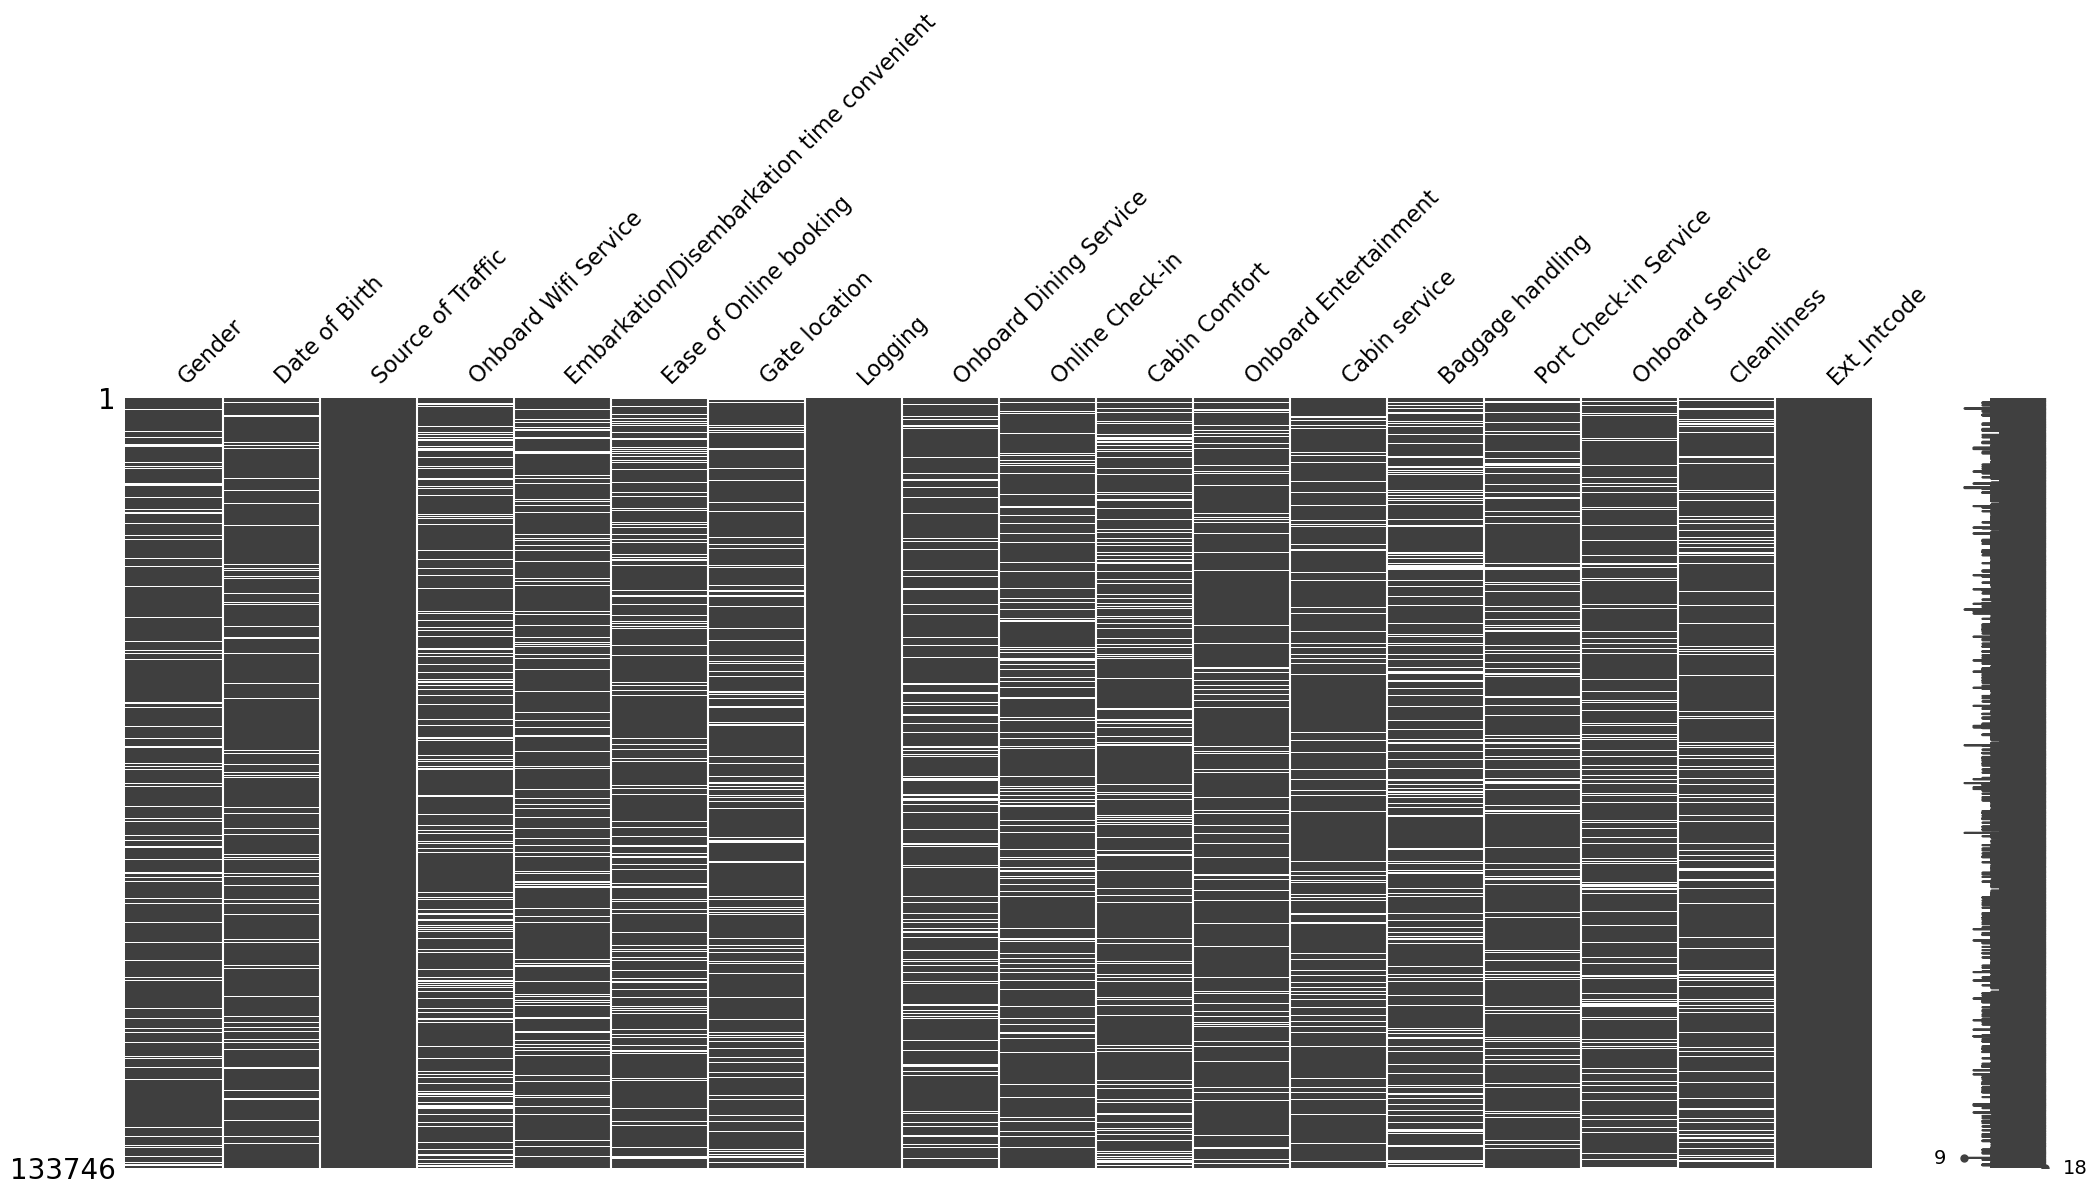

In [8]:
msno.matrix(df_pre)

<AxesSubplot:>

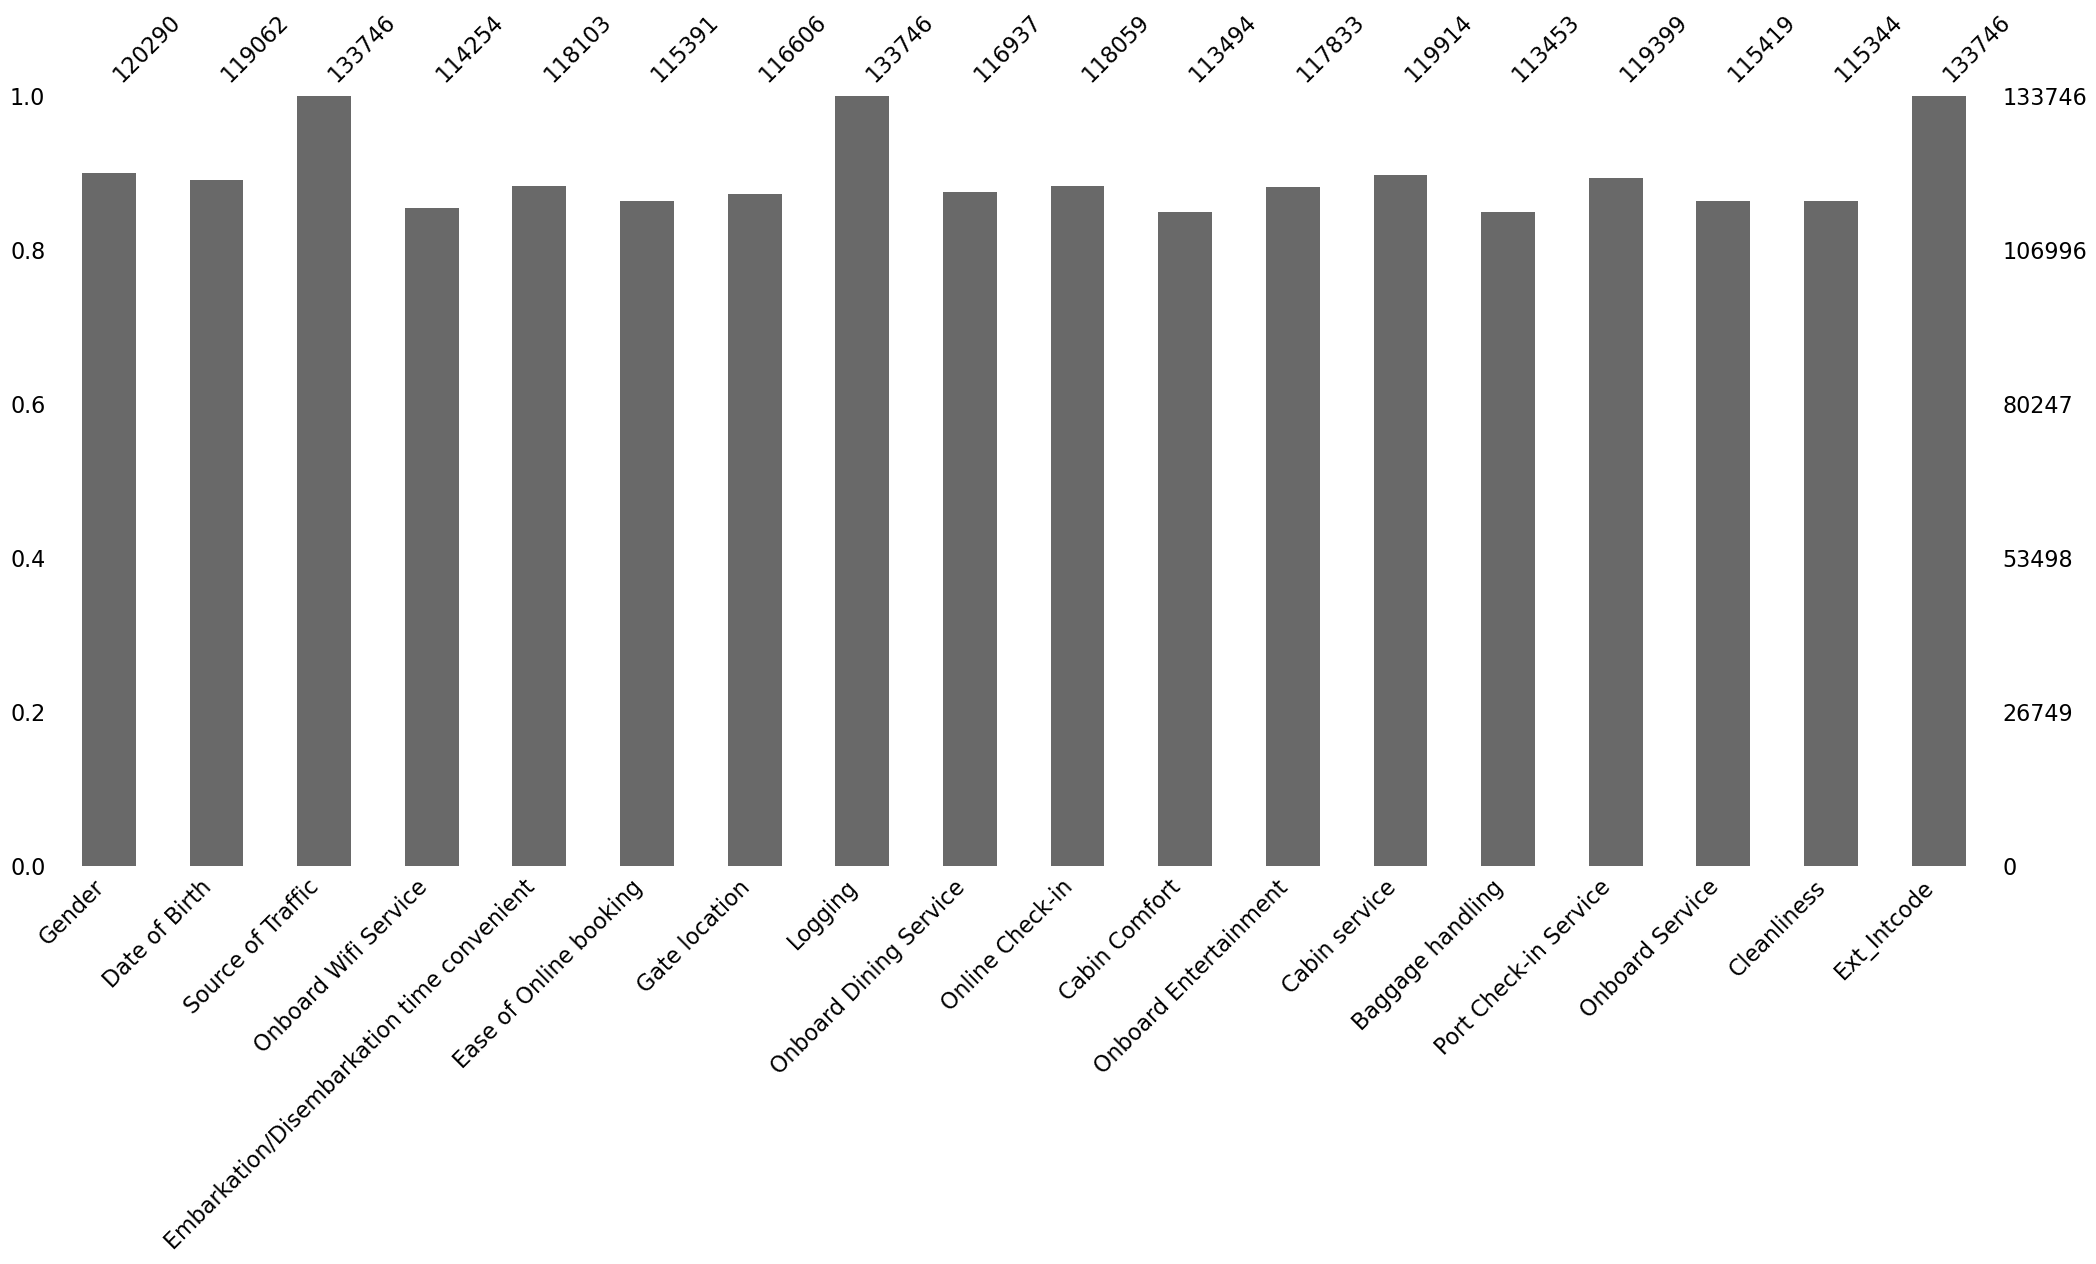

In [9]:
msno.bar(df_pre)

<AxesSubplot:>

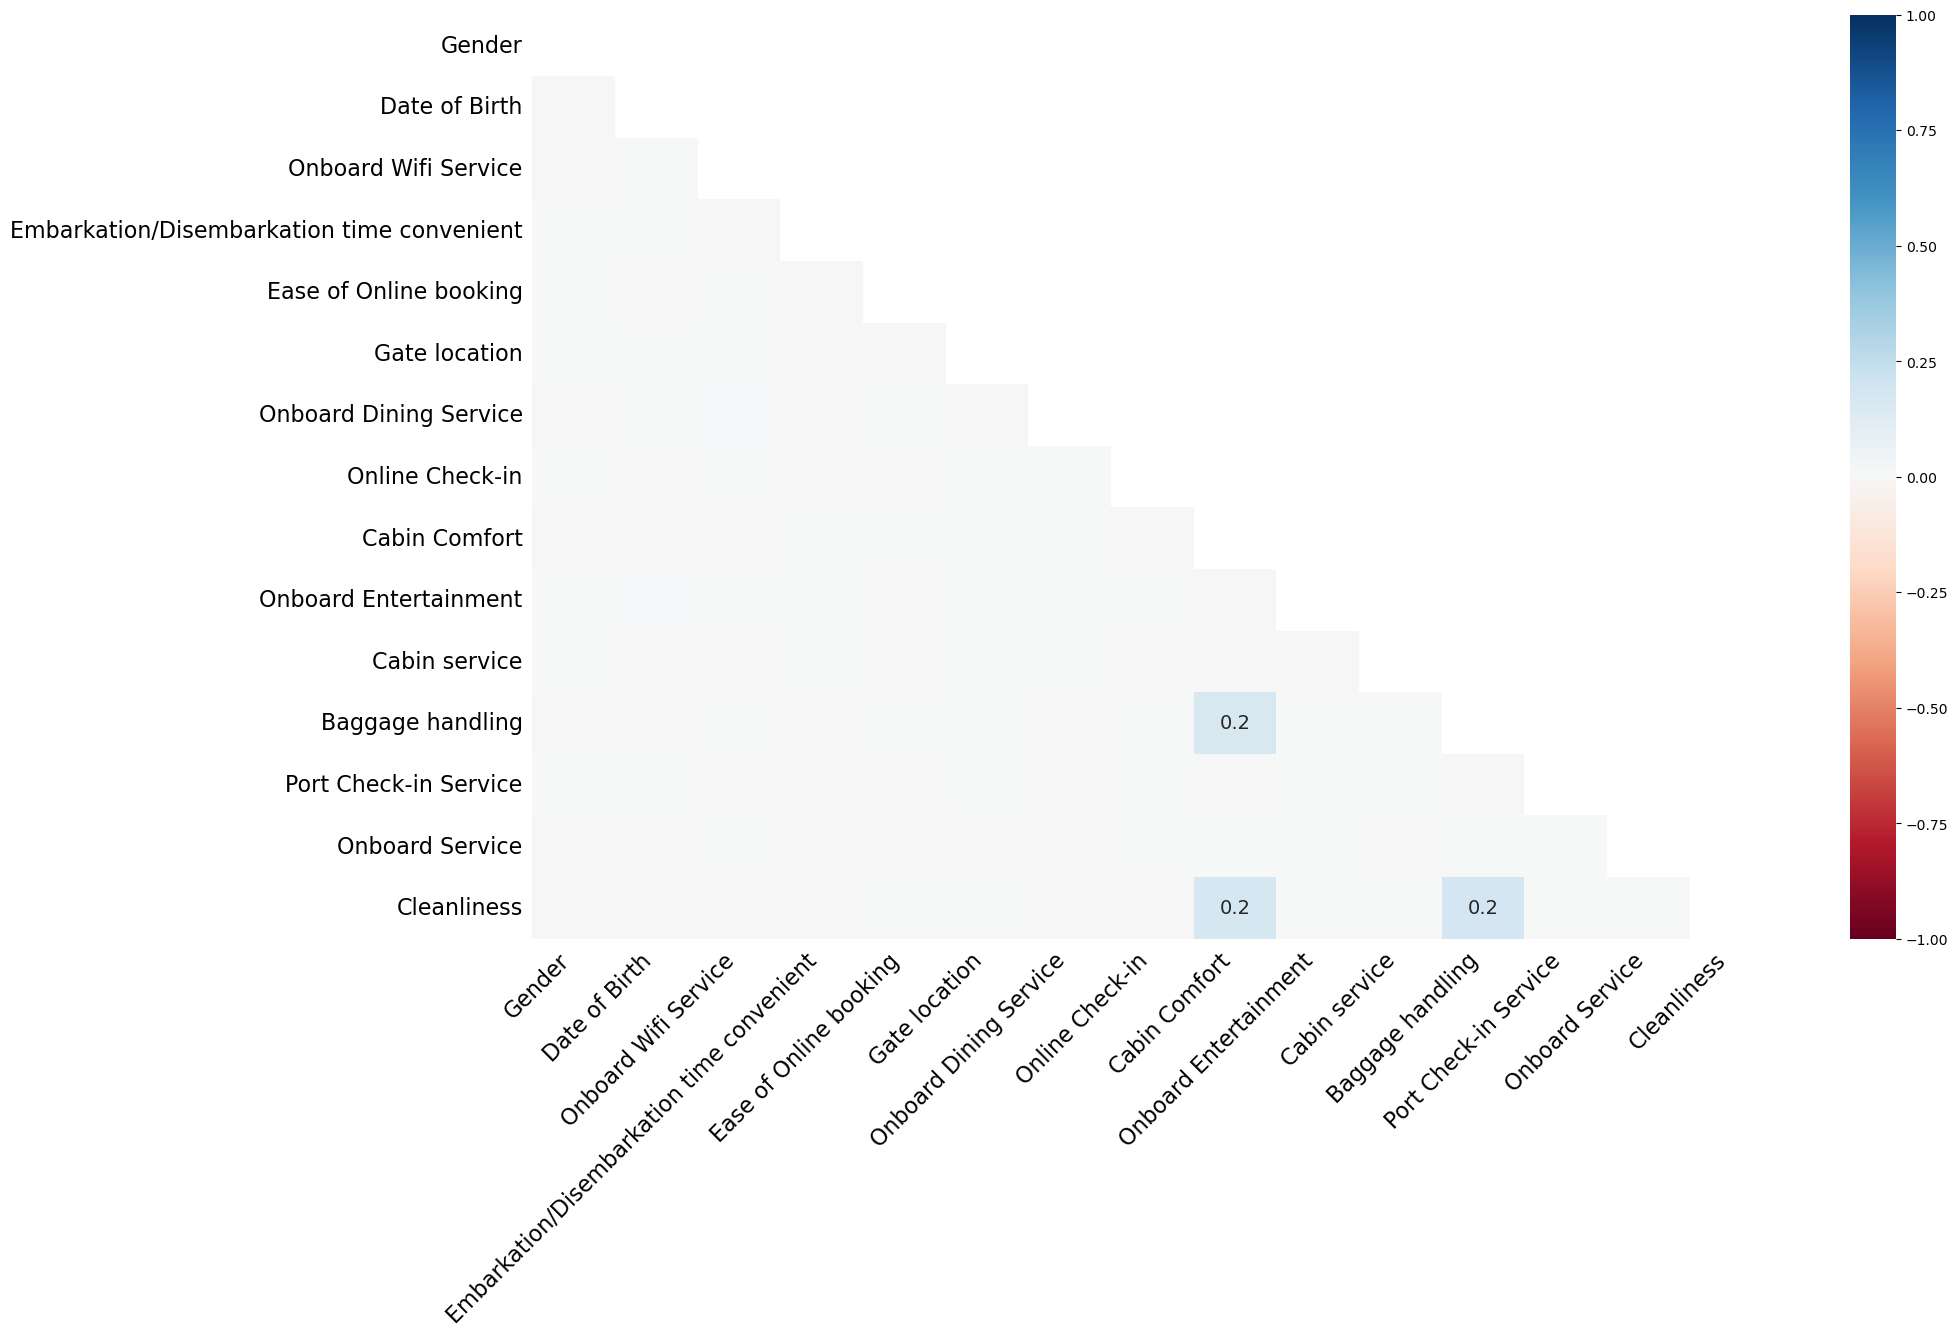

In [10]:
msno.heatmap(df_pre)

### `df_post`

<AxesSubplot:>

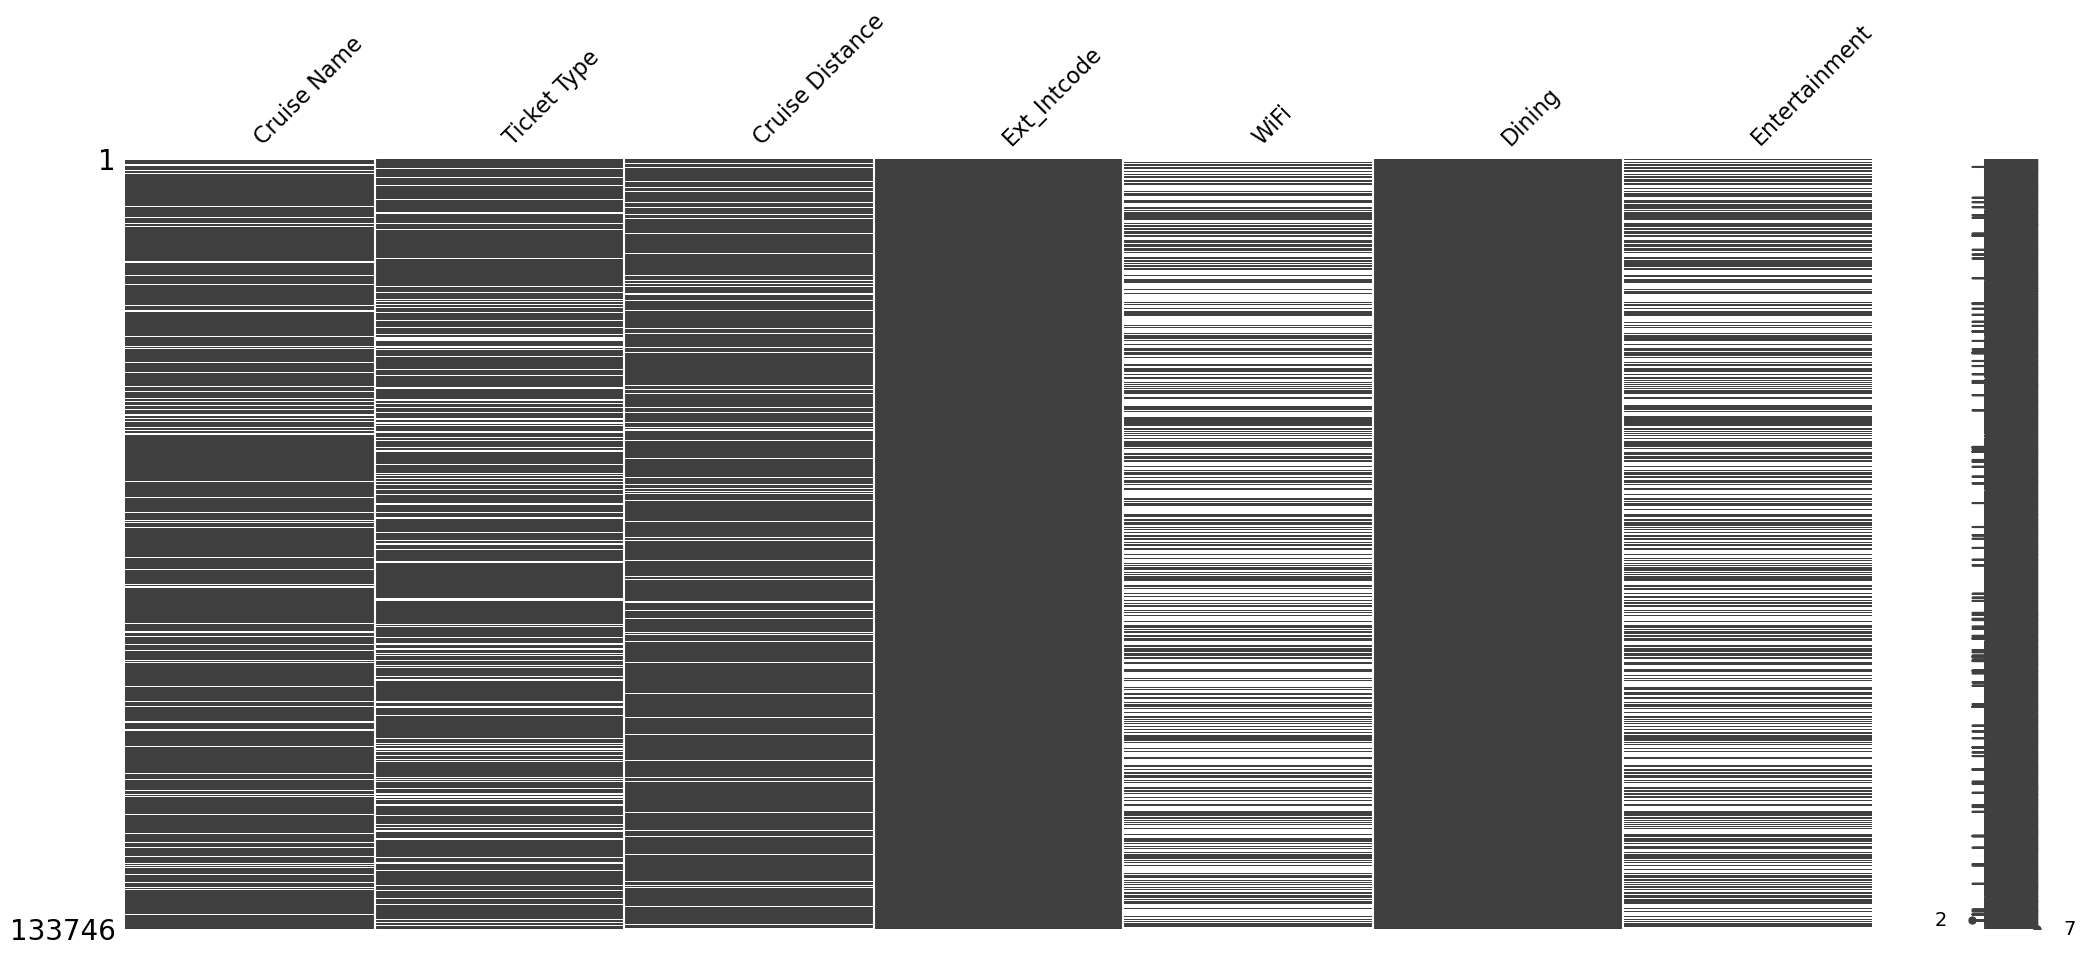

In [11]:
msno.matrix(df_post)

<AxesSubplot:>

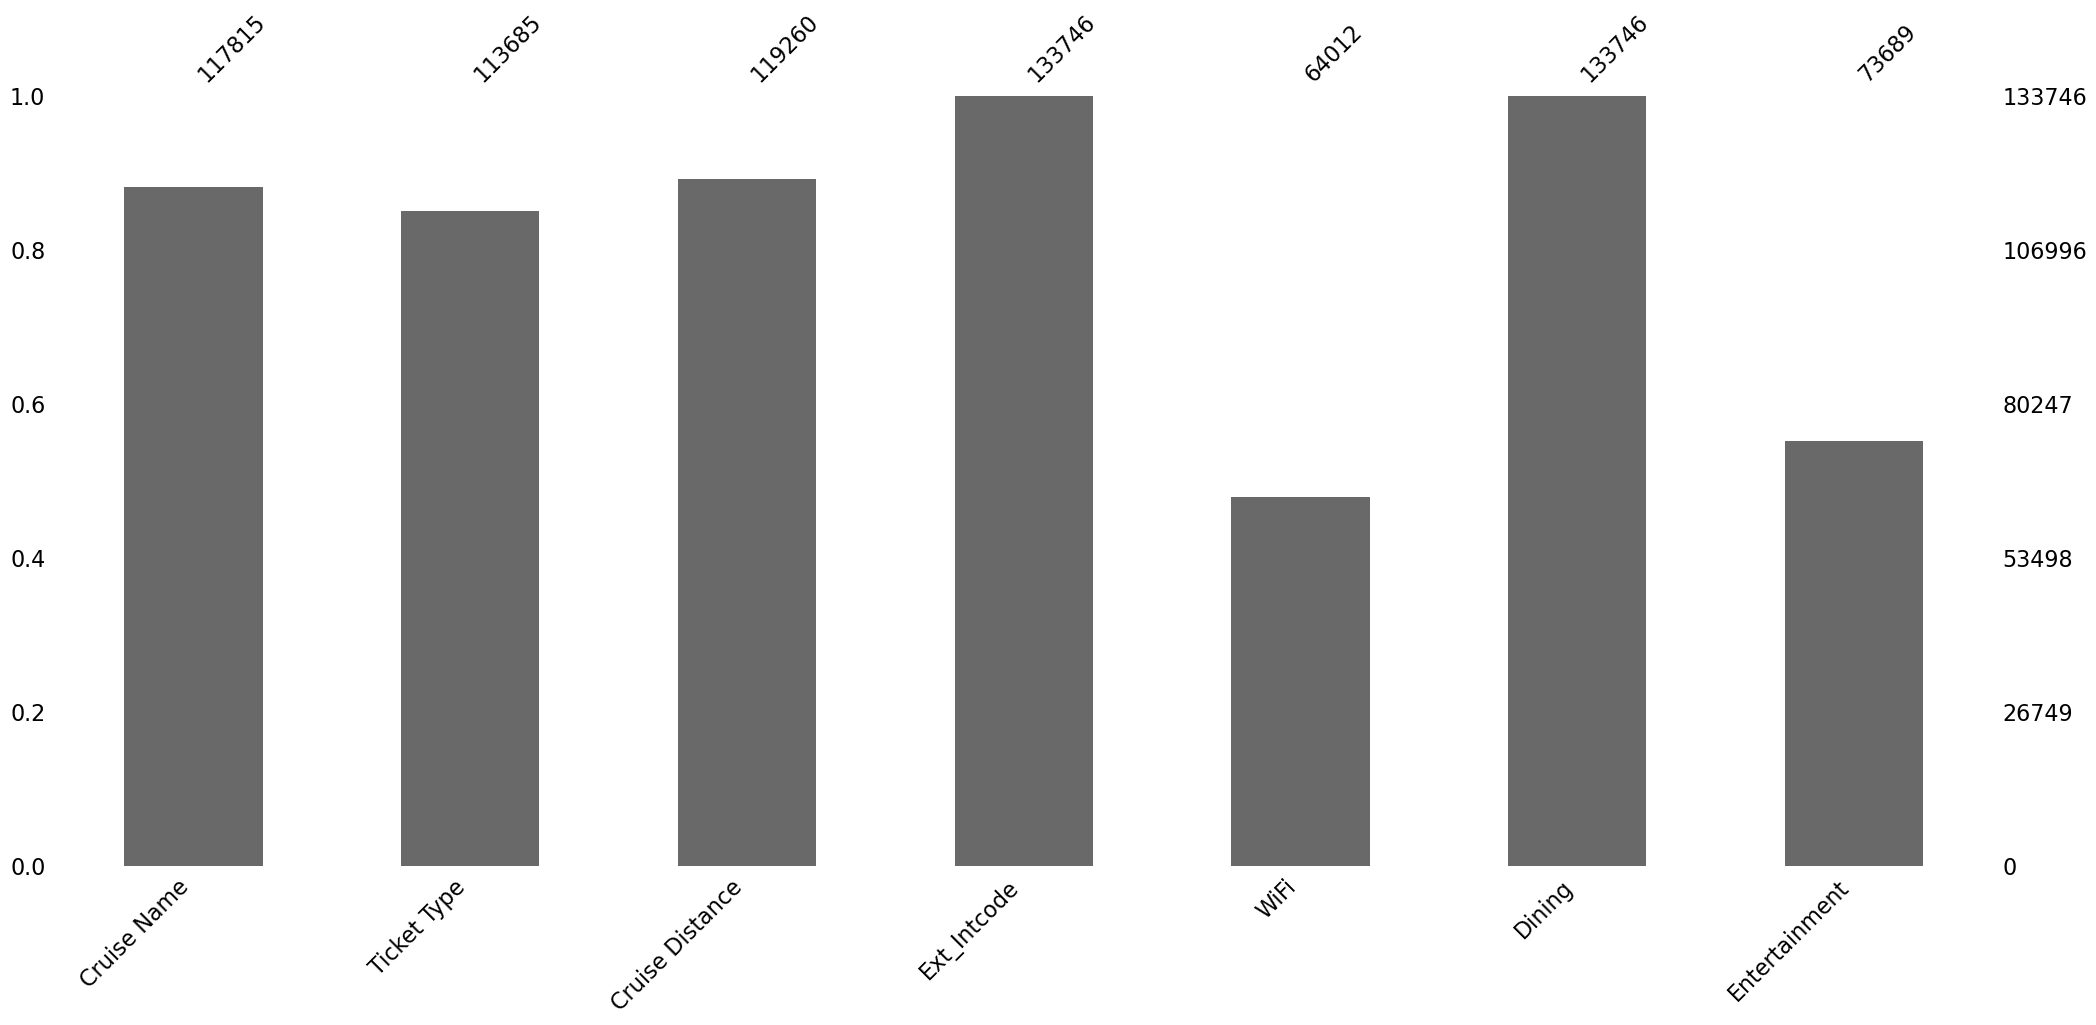

In [12]:
msno.bar(df_post)

<AxesSubplot:>

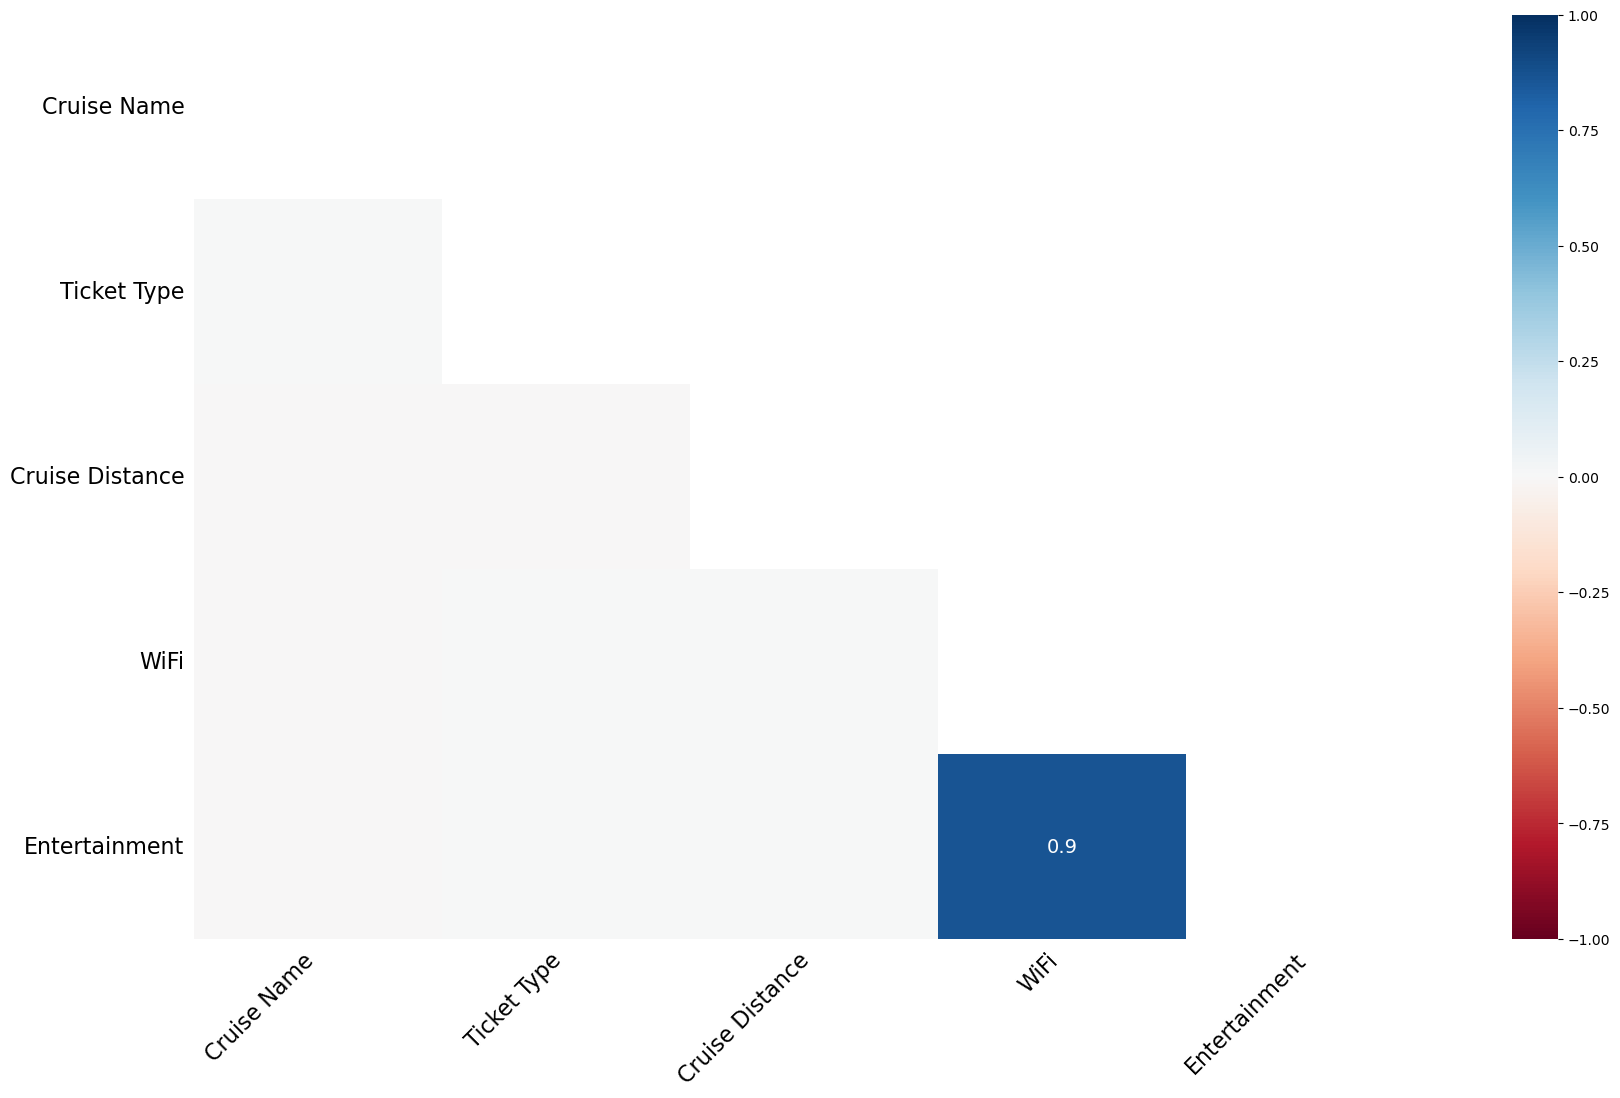

In [13]:
msno.heatmap(df_post)

### Findings

 Not much dependence between occurence of missing values in `df_pre`. For `df_post`, also not much dependence except for `WiFi` and `Entertainment` with the value of `0.9`.   
 
   
These nans should require imputation as customers are required to answer these questions without leaving them blank

## Renaming  
  
For a more consistent feature naming scheme easier to use on pandas

In [14]:
df_pre.rename({"Ext_Intcode":"internal_passanger_code"},axis=1,inplace=True)
df_post.rename({"Ext_Intcode":"internal_passanger_code"},axis=1,inplace=True)

def replace_spaces(x):
    return x.replace(" ","_").strip().lower()


df_pre.rename(replace_spaces,axis=1,inplace=True)
df_post.rename(replace_spaces,axis=1,inplace=True)

df_pre.columns

Index(['gender', 'date_of_birth', 'source_of_traffic', 'onboard_wifi_service',
       'embarkation/disembarkation_time_convenient', 'ease_of_online_booking',
       'gate_location', 'logging', 'onboard_dining_service', 'online_check-in',
       'cabin_comfort', 'onboard_entertainment', 'cabin_service',
       'baggage_handling', 'port_check-in_service', 'onboard_service',
       'cleanliness', 'internal_passanger_code'],
      dtype='object')

In [15]:
df_post.columns

Index(['cruise_name', 'ticket_type', 'cruise_distance',
       'internal_passanger_code', 'wifi', 'dining', 'entertainment'],
      dtype='object')

## Retyping

for easier manupilation later

In [16]:
df_pre.logging = pd.to_datetime(df_pre.logging)

## Are there any rows with repeated passanger code in each dataset?

Since since there is no mentioned of unique passanger code required, It maybe good to keep them if they are from different logging times and remove if they are too similar? 

Does post trip data also have vouchers and upgrades available just like the the pre trip data?

In [17]:
df_pre.internal_passanger_code.nunique == df_pre.shape[0]

False

In [18]:
df_post.internal_passanger_code.nunique == df_post.shape[0]

False

In [19]:
df_pre.internal_passanger_code.nunique == df_post.internal_passanger_code.nunique

False

In [20]:
df_pre[df_pre.internal_passanger_code == "LB432ICTGXU"]

,gender,date_of_birth,source_of_traffic,onboard_wifi_service,embarkation/disembarkation_time_convenient,ease_of_online_booking,gate_location,logging,onboard_dining_service,online_check-in,cabin_comfort,onboard_entertainment,cabin_service,baggage_handling,port_check-in_service,onboard_service,cleanliness,internal_passanger_code
index,,,,,,,,,,,,,,,,,,
52144,Female,07/10/1971,Direct - Company Website,Extremely important,NaN,5.0,5.0,2023-05-04 14:23:00,A little important,4.0,5.0,Very important,4.0,4.0,4.0,4.0,5.0,LB432ICTGXU


In [21]:
df_pre_2 = df_pre.groupby("internal_passanger_code").size()[lambda x: x>1]
df_pre_2

internal_passanger_code
BL100AELMIT    2
BL100BAEEDV    2
BL101JCYHUN    2
BL102VXNCWI    2
BL103WSCLDK    2
              ..
LB998NKZBAN    2
LB998UTRAPB    2
LB999KFVUVU    2
LB999UMWQNO    2
LB999XKYNTS    2
Length: 3896, dtype: int64

In [22]:
df_post_2 = df_post.groupby("internal_passanger_code").size()[lambda x: x>1]
df_post_2

internal_passanger_code
BL100AELMIT    2
BL100BAEEDV    2
BL101JCYHUN    2
BL102VXNCWI    2
BL103WSCLDK    2
              ..
LB998NKZBAN    2
LB998UTRAPB    2
LB999KFVUVU    2
LB999UMWQNO    2
LB999XKYNTS    2
Length: 3896, dtype: int64

for both cases, the max is two entries per passanger code

In [23]:
(df_post_2.index == df_pre_2.index).all()

True

In [24]:
df_pre_2 = df_pre[lambda x: x.internal_passanger_code.isin(df_pre_2.index)]

In [25]:
df_pre_2 

,gender,date_of_birth,source_of_traffic,onboard_wifi_service,embarkation/disembarkation_time_convenient,ease_of_online_booking,gate_location,logging,onboard_dining_service,online_check-in,cabin_comfort,onboard_entertainment,cabin_service,baggage_handling,port_check-in_service,onboard_service,cleanliness,internal_passanger_code
index,,,,,,,,,,,,,,,,,,
4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,2023-01-01 00:06:00,Not at all important,2.0,NaN,Not at all important,3.0,NaN,5.0,2.0,NaN,LB218CFLOBS
5,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,2023-01-01 00:11:00,Not at all important,2.0,1.0,Not at all important,3.0,3.0,5.0,2.0,1.0,LB218CFLOBS
12,Female,08/05/2000,Direct - Company Website,None,5.0,1.0,5.0,2023-01-01 00:21:00,Extremely important,1.0,NaN,Extremely important,5.0,NaN,5.0,5.0,NaN,LB810DDUDEB
16,Female,08/05/2000,Direct - Company Website,None,5.0,1.0,5.0,2023-01-01 00:26:00,Extremely important,1.0,5.0,Extremely important,5.0,4.0,5.0,5.0,5.0,LB810DDUDEB
29,None,12/03/1987,Direct - Company Website,Somewhat important,3.0,3.0,3.0,2023-01-01 01:05:00,Very important,4.0,NaN,Very important,4.0,NaN,3.0,4.0,NaN,LB409GVSFKP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133714,Female,16/06/1970,Direct - Email Marketing,A little important,2.0,2.0,2.0,2023-08-31 22:03:00,Very important,3.0,5.0,Very important,4.0,4.0,5.0,4.0,4.0,LB587YIYYVT
133731,Male,15/03/1958,Direct - Company Website,Very important,5.0,4.0,5.0,2023-08-31 23:07:00,Not at all important,4.0,NaN,Not at all important,5.0,NaN,4.0,4.0,NaN,BL767MCLTEW
133733,Male,15/03/1958,Direct - Company Website,Very important,5.0,4.0,5.0,2023-08-31 23:12:00,Not at all important,4.0,1.0,Not at all important,5.0,4.0,4.0,4.0,1.0,BL767MCLTEW


### troubling datetime difference

In [26]:
logging_diff = df_pre_2.logging.diff(periods=1)
logging_diff.iloc[2::2] = timedelta(0)
df_pre_2["logging_difference"] = logging_diff
df_pre_2[["internal_passanger_code","logging","logging_difference"]].head(20)

/tmp/ipykernel_189334/822240439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_2["logging_difference"] = logging_diff


,internal_passanger_code,logging,logging_difference
index,,,
4,LB218CFLOBS,2023-01-01 00:06:00,NaT
5,LB218CFLOBS,2023-01-01 00:11:00,0 days 00:05:00
12,LB810DDUDEB,2023-01-01 00:21:00,0 days 00:00:00
16,LB810DDUDEB,2023-01-01 00:26:00,0 days 00:05:00
29,LB409GVSFKP,2023-01-01 01:05:00,0 days 00:00:00
31,LB409GVSFKP,2023-01-01 01:10:00,0 days 00:05:00
37,BL870JKZNZY,2023-01-01 01:14:00,0 days 00:00:00
41,BL870JKZNZY,2023-01-01 01:19:00,0 days 00:05:00
48,LB325CKADFV,2023-01-01 01:32:00,0 days 00:00:00


In [27]:
df_pre_2["logging_difference"][lambda x: x>timedelta(minutes=5)]

index
6135    29 days 00:05:00
17778   30 days 00:05:00
68964   30 days 00:05:00
84770   30 days 00:05:00
Name: logging_difference, dtype: timedelta64[ns]

Some have about 30 days difference

In [28]:
df_post_2 = df_post[lambda x: x.internal_passanger_code.isin(df_post_2.index)]
df_post_2

,cruise_name,ticket_type,cruise_distance,internal_passanger_code,wifi,dining,entertainment
index,,,,,,,
4,Lapras,Standard,1145 Miles,LB218CFLOBS,NaN,1,NaN
5,Lapras,Standard,1145 Miles,LB218CFLOBS,NaN,1,NaN
12,blast,Standard,236 Miles,LB810DDUDEB,NaN,0,NaN
16,blast,Standard,236 Miles,LB810DDUDEB,NaN,0,NaN
29,Blastoise,Luxury,2450 KM,LB409GVSFKP,1.0,1,1.0
...,...,...,...,...,...,...,...
133714,Blastoise,Luxury,2075 KM,LB587YIYYVT,0.0,1,1.0
133731,Lapras,Deluxe,936 KM,BL767MCLTEW,NaN,0,0.0
133733,Lapras,Deluxe,936 KM,BL767MCLTEW,NaN,0,0.0


### Findings

There are repeated customer passanger code, I need to compare such repeats and decide whelther to drop it or to combine them in some ways.


## Splitting and joining

It seesm that each 

In [56]:
temp = df_post.drop(["internal_passanger_code"]
df = pd.concat([df_pre,temp],axis=1,)
df_x = df.drop(["ticket_type"],axis =1)
df_y = df.ticket_type

## replacing str values to numbers, is this even necessary??

In [62]:
map1 ={
'A little important':'1', 'Not at all important':'0',None:-1,
       'Very important':'3', 'Somewhat important':'2', 'Extremely important':'5'}

df_x.onboard_wifi_service = df_x.onboard_wifi_service.replace(map1)
df_x.onboard_entertainment = df_x.onboard_entertainment.replace(map1)
df_x.onboard_service = df_x.onboard_service.replace(map1)
df_x.onboard_dining_service = df_x.onboard_dining_service.replace(map1)


In [65]:
df_x.iloc[:10,:10]

,gender,date_of_birth,source_of_traffic,onboard_wifi_service,embarkation/disembarkation_time_convenient,ease_of_online_booking,gate_location,logging,onboard_dining_service,online_check-in
index,,,,,,,,,,
0,None,05/10/1973,Direct - Company Website,1,3.0,5.0,3.0,2023-01-01 00:00:00,3,2.0
1,Female,None,Indirect - Social Media,0,4.0,1.0,NaN,2023-01-01 00:01:00,3,NaN
2,Female,22/07/1998,Indirect - Search Engine,-1,3.0,0.0,5.0,2023-01-01 00:02:00,-1,NaN
3,Female,01/05/1970,Direct - Company Website,3,4.0,4.0,4.0,2023-01-01 00:05:00,2,4.0
4,Male,07/01/1960,Direct - Company Website,2,4.0,2.0,NaN,2023-01-01 00:06:00,0,2.0
5,Male,07/01/1960,Direct - Company Website,2,4.0,2.0,NaN,2023-01-01 00:11:00,0,2.0
6,Male,23/12/1986,Direct - Email Marketing,2,5.0,3.0,3.0,2023-01-01 00:11:00,3,NaN
7,Male,20/03/1987,Indirect - Social Media,3,1.0,4.0,4.0,2023-01-01 00:12:00,1,NaN
8,Female,20/12/1981,Direct - Email Marketing,5,4.0,NaN,4.0,2023-01-01 00:13:00,3,1.0


In [66]:
df_x.iloc[:10,10:20]

,cabin_comfort,onboard_entertainment,cabin_service,baggage_handling,port_check-in_service,onboard_service,cleanliness,internal_passanger_code,cruise_name,cruise_distance
index,,,,,,,,,,
0,2.0,1,2.0,2.0,4.0,2.0,3.0,LB446RWOOZI,Blastoise,3567 KM
1,4.0,-1,2.0,3.0,4.0,4.0,4.0,LB138HKBECM,Blastoise,672 KM
2,5.0,5,2.0,1.0,2.0,3.0,NaN,BL713UHBAAN,IAPRAS,1167 KM
3,4.0,-1,NaN,NaN,3.0,2.0,4.0,LB243DMKCFL,Lapras,280 KM
4,NaN,0,3.0,NaN,5.0,2.0,NaN,LB218CFLOBS,Lapras,1145 Miles
5,1.0,0,3.0,3.0,5.0,2.0,1.0,LB218CFLOBS,Lapras,1145 Miles
6,4.0,3,NaN,4.0,3.0,4.0,4.0,BL115AWWXPU,Lapras,607 KM
7,2.0,1,2.0,4.0,4.0,NaN,2.0,LB313ANTIPC,Blastoise,528 KM
8,2.0,5,5.0,5.0,3.0,5.0,1.0,BL537GQMWKI,Blastoise,None


# Nan imputation